In [2]:
import pandas as pd
import matplotlib.pyplot as plt
store_6762 = pd.read_excel('6762 - P+H.xlsx')
store_8741 = pd.read_excel('8741 - Small Store - Επαρχία.xlsx')
store_7331 = pd.read_excel('7331 - Small Store Athens.xlsx')
store_7498 = pd.read_excel('7498 - PBL Malls.xlsx')
opa_final = pd.read_excel('7498 - PBL Malls.xlsx')


In [3]:
opa_final = pd.read_excel('ΟΠΑ data final.xlsx', sheet_name = None)
visitors = opa_final['Visitors']
receipts = opa_final['Receipts']
schedule = opa_final['Schedule']

Merge sheet visitors and receipts

In [4]:
opa_final_merged= pd.merge(receipts, visitors, on=['store', 'hour', 'date'], how='inner')


In [5]:
opa_final_merged


,store,receipts,hour,date,visitors
0,6762,69,18,2024-03-09,131
1,8741,18,14,2024-02-26,73
2,8741,35,11,2024-04-30,152
3,6762,48,21,2024-01-05,0
4,7331,34,16,2024-04-13,77
...,...,...,...,...,...
14132,7331,22,17,2024-05-15,69
14133,7498,41,21,2024-11-29,0
14134,7498,32,17,2024-09-13,270
14135,6762,31,13,2024-01-14,74


Keep columns where visitors>= receipts

In [6]:
difference_gte_50_df = opa_final_merged[(opa_final_merged['receipts'] - opa_final_merged['visitors']) >= 50]
print("\nRows where receipts - visitors >= 50:")
print(difference_gte_50_df)
timeline_data = []
true_count = 0
for _, current_row in difference_gte_50_df.iterrows():
    previous_row_1 = opa_final_merged[
        (opa_final_merged ['store'] == current_row['store']) &
        (opa_final_merged ['date'] == current_row['date']) &
        (opa_final_merged ['hour'] == current_row['hour'] - 1)
    ]
    previous_row_2 = opa_final_merged [
        (opa_final_merged ['store'] == current_row['store']) &
        (opa_final_merged ['date'] == current_row['date']) &
        (opa_final_merged ['hour'] == current_row['hour'] - 2)
    ]
    previous_row_3 = opa_final_merged [
        (opa_final_merged ['store'] == current_row['store']) &
        (opa_final_merged ['date'] == current_row['date']) &
        (opa_final_merged ['hour'] == current_row['hour'] - 3)
    ]
    if current_row['visitors'] == 0:
        formula_condition = (
            ((previous_row_3['visitors'].iloc[0] - previous_row_3['receipts'].iloc[0]) +
             (previous_row_2['visitors'].iloc[0] - previous_row_2['receipts'].iloc[0])) * 3
        ) <= current_row['receipts'] if not previous_row_3.empty and not previous_row_2.empty else False

        if formula_condition:
            true_count += 1

        timeline_data.append({
            "Previous Row (Hour - 1)": previous_row_1.iloc[0].to_dict() if not previous_row_1.empty else None,
            "Previous Row (Hour - 2)": previous_row_2.iloc[0].to_dict() if not previous_row_2.empty else None,
            "Previous Row (Hour - 3)": previous_row_3.iloc[0].to_dict() if not previous_row_3.empty else None,
            "Current Row": {**current_row.to_dict(), "index": current_row.name},
            "Formula Condition Met": formula_condition
        })

# Print the timeline data with the formula condition
print("\nTimeline Data (Previous Rows and Current Row with Formula Condition):")
for pair in timeline_data:
    print("Previous Row (Hour - 3):", pair["Previous Row (Hour - 3)"])
    print("Previous Row (Hour - 2):", pair["Previous Row (Hour - 2)"])
    print("Previous Row (Hour - 1):", pair["Previous Row (Hour - 1)"])
    print("Current Row:", pair["Current Row"])
    print("Formula Condition Met:", pair["Formula Condition Met"])
    print("---")

# Print the count of rows where the formula condition was met
print(f"\nCount of rows where the formula condition was met: {true_count}")
to_remove_indices = [pair['Current Row']['index'] for pair in timeline_data if pair['Formula Condition Met']]
opa_final_merged = opa_final_merged.drop(index=to_remove_indices)


Rows where receipts - visitors >= 50:
       store  receipts  hour       date  visitors
171     6762        90    21 2024-03-09         0
337     6762        54    18 2024-11-06         0
341     6762        56    21 2024-09-03         0
345     7498        69    21 2024-09-09         0
388     7498       173    21 2024-10-05         0
...      ...       ...   ...        ...       ...
13785   7331        56    11 2024-10-19         0
13803   6762        59    21 2024-09-12         0
13804   8741        92    21 2024-11-28         0
13873   8741        81    18 2024-05-03         5
13967   6762       273    11 2024-09-13        95

[160 rows x 5 columns]

Timeline Data (Previous Rows and Current Row with Formula Condition):
Previous Row (Hour - 3): {'store': 6762, 'receipts': 69, 'hour': 18, 'date': Timestamp('2024-03-09 00:00:00'), 'visitors': 131}
Previous Row (Hour - 2): {'store': 6762, 'receipts': 98, 'hour': 19, 'date': Timestamp('2024-03-09 00:00:00'), 'visitors': 113}
Previous R

In [7]:
opa_final_merged 

,store,receipts,hour,date,visitors
0,6762,69,18,2024-03-09,131
1,8741,18,14,2024-02-26,73
2,8741,35,11,2024-04-30,152
3,6762,48,21,2024-01-05,0
4,7331,34,16,2024-04-13,77
...,...,...,...,...,...
14132,7331,22,17,2024-05-15,69
14133,7498,41,21,2024-11-29,0
14134,7498,32,17,2024-09-13,270
14135,6762,31,13,2024-01-14,74


Make different tables for each store

In [8]:
s6762 = opa_final_merged [opa_final_merged ['store']==6762]
s8741 = opa_final_merged [opa_final_merged ['store']==8741]
s7331= opa_final_merged [opa_final_merged ['store']==7331]
s7498 = opa_final_merged [opa_final_merged ['store']==7498]

Detect and remove outliers for each store

In [9]:
numeric_columns = ['visitors', 'receipts']


def remove_outliers_iqr(df, columns):
    lower_bound = 0
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1             
        upper_bound = Q3 + 1.5 * IQR
        print(col,lower_bound,upper_bound)
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
s6762=remove_outliers_iqr(s6762, numeric_columns)
s8741=remove_outliers_iqr(s8741, numeric_columns)
s7331=remove_outliers_iqr(s7331, numeric_columns)
s7498=remove_outliers_iqr(s7498, numeric_columns)

visitors 0 199.0
receipts 0 65.5
visitors 0 264.5
receipts 0 87.0
visitors 0 237.5
receipts 0 80.5
visitors 0 651.5
receipts 0 158.0


## Store 6762

Avg visitors and receipts by month

In [10]:

s6762['month'] =  s6762['date'].dt.to_period('M')

monthly_averages_s6762 = s6762.groupby('month')[['visitors', 'receipts']].mean()
monthly_averages_s6762.reset_index(inplace=True)
monthly_averages_s6762['month'] = monthly_averages_s6762['month'].dt.strftime('%B')

In [11]:
monthly_averages_s6762

,month,visitors,receipts
0,January,79.024735,30.869258
1,February,70.083067,28.137380
2,March,64.800000,26.696552
3,April,75.053521,22.357746
4,May,81.903846,26.361538
5,June,86.940063,26.208202
6,July,87.612069,25.732759
7,August,87.322917,24.857639
8,September,88.871324,33.191176
9,October,60.862928,28.928349


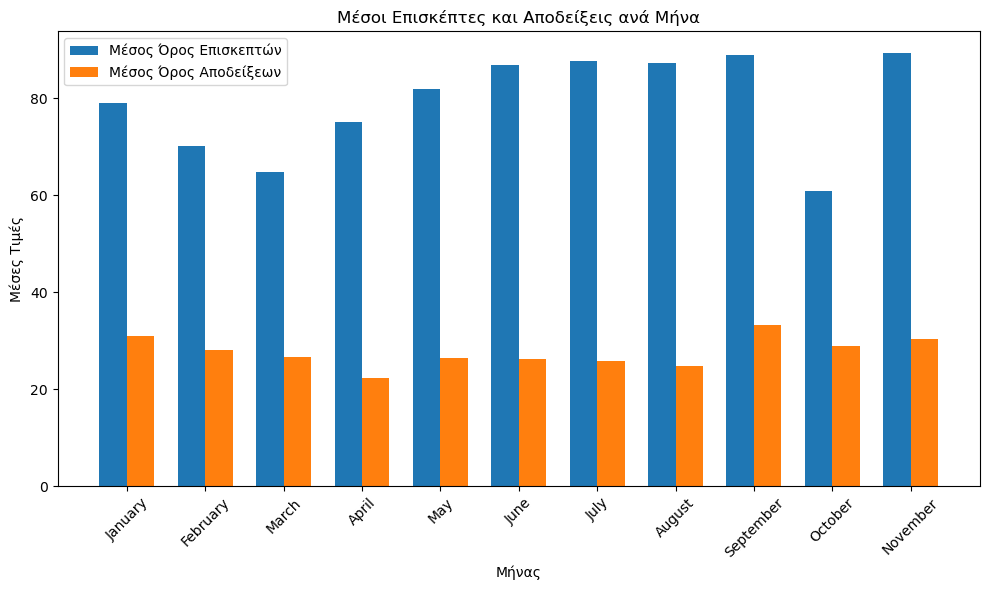

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(monthly_averages_s6762['month']))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Στήλες για avg_visitors
ax.bar(x - width / 2, monthly_averages_s6762['visitors'], width, label='Μέσος Όρος Επισκεπτών')

# Στήλες για avg_receipts
ax.bar(x + width / 2, monthly_averages_s6762['receipts'], width, label='Μέσος Όρος Αποδείξεων')

# Ρυθμίσεις άξονα και τίτλων
ax.set_xlabel('Μήνας')
ax.set_ylabel('Μέσες Τιμές')
ax.set_title('Μέσοι Επισκέπτες και Αποδείξεις ανά Μήνα')
ax.legend()

# Εμφάνιση γραφήματος
ax.set_xticks(x)
ax.set_xticklabels(monthly_averages_s6762['month'])
plt.xticks(rotation=45)  # Περιστροφή των ετικετών του άξονα x
plt.tight_layout()
plt.show()

In [13]:
s6762['day'] = s6762['date'].dt.day_name()

In [14]:
s6762['month_name'] = s6762['month'].dt.strftime('%B')


In [15]:

month_day_averages_s6762 = s6762.groupby(['month_name','day'])[['visitors', 'receipts']].mean()
month_day_averages_s6762.reset_index(inplace=True)
month_day_averages_s6762

,month_name,day,visitors,receipts
0,April,Friday,67.872727,21.218182
1,April,Monday,73.469697,22.196970
2,April,Saturday,111.122449,32.000000
3,April,Sunday,88.111111,24.000000
4,April,Thursday,64.814815,19.944444
...,...,...,...,...
64,September,Monday,89.666667,34.611111
65,September,Saturday,108.906250,39.062500
66,September,Thursday,76.062500,30.250000
67,September,Tuesday,85.600000,32.500000


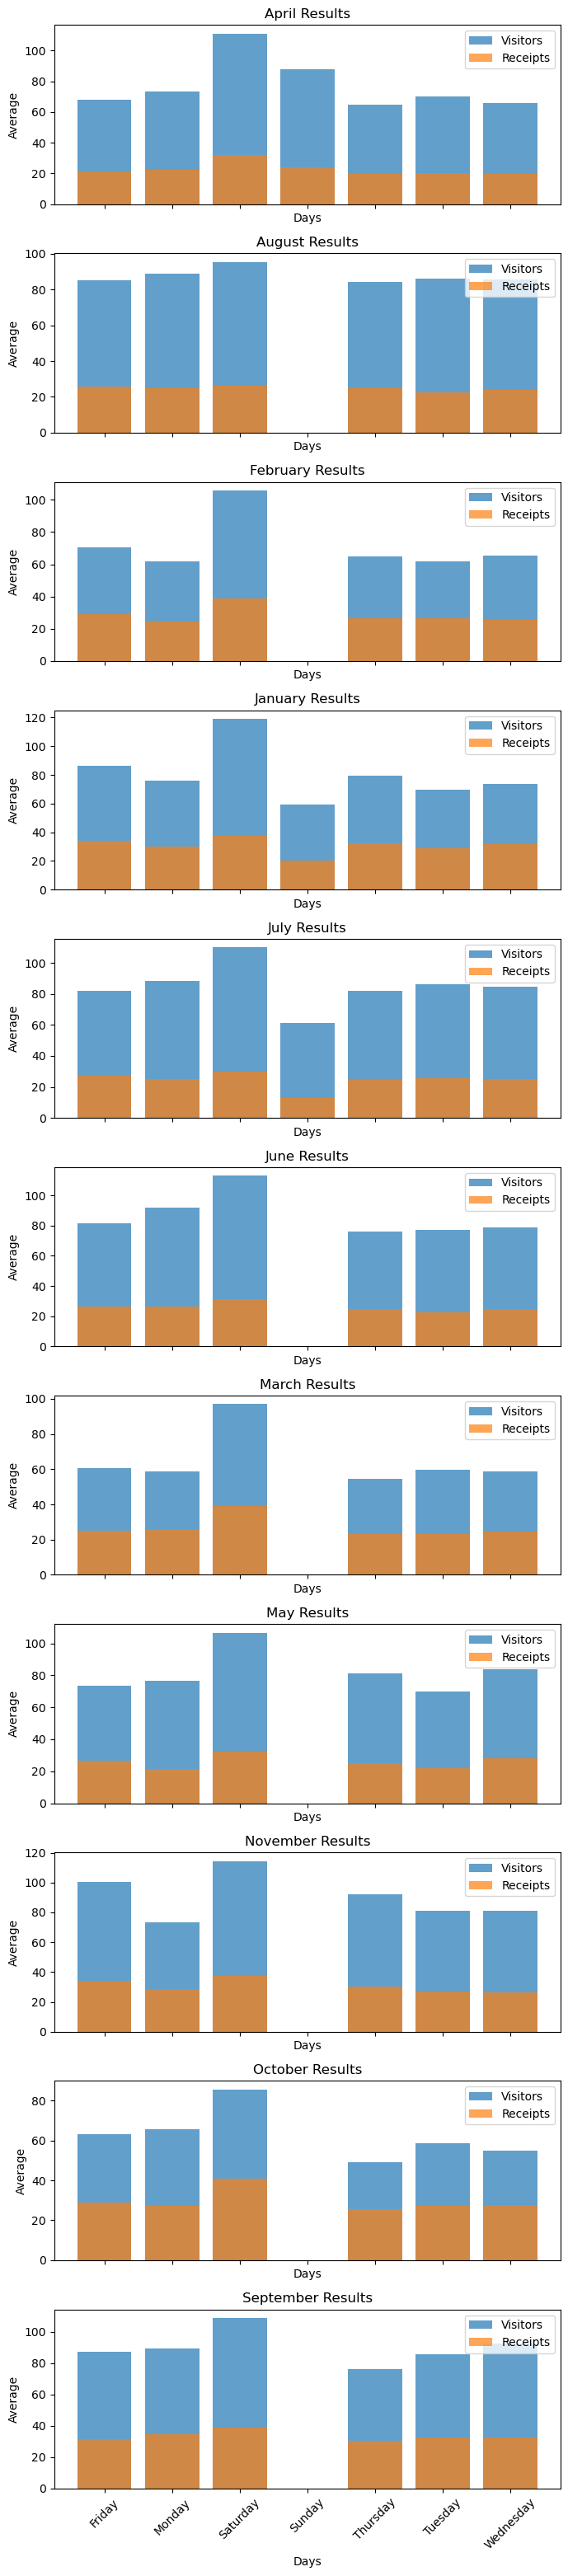

In [16]:
months = month_day_averages_s6762['month_name'].unique()

# Δημιουργία πολλαπλών plots
fig, axes = plt.subplots(len(months), 1, figsize=(7, 3 * len(months)), sharex=True)

for i, month in enumerate(months):
    # Φιλτράρισμα δεδομένων για κάθε μήνα
    month_data =  month_day_averages_s6762[ month_day_averages_s6762['month_name'] == month]
    
    # Δημιουργία plot για κάθε μήνα
    axes[i].bar(month_data['day'], month_data['visitors'], label='Visitors', alpha=0.7)
    axes[i].bar(month_data['day'], month_data['receipts'], label='Receipts', alpha=0.7)
    
    axes[i].set_xticks(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])
    axes[i].set_xticklabels(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], rotation=45) 

    # Προσθήκη τίτλου και ρυθμίσεις
    axes[i].set_title(f'{month} Results')
    axes[i].set_ylabel('Average')
    axes[i].set_xlabel('Days')
    axes[i].legend()
   




# Ρύθμιση layout
  # Ρυθμίσεις για να μην επικαλύπτονται οι ετικέτες
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()





In [17]:
day_hour_averages_s6762 = s6762.groupby(['day','hour'])[['visitors', 'receipts']].mean()
day_hour_averages_s6762.reset_index(inplace=True)
day_hour_averages_s6762

,day,hour,visitors,receipts
0,Friday,7,0.000000,9.000000
1,Friday,9,45.545455,11.568182
2,Friday,10,62.755556,18.333333
3,Friday,11,80.533333,23.555556
4,Friday,12,87.978261,30.260870
...,...,...,...,...
95,Wednesday,18,115.119048,36.261905
96,Wednesday,19,135.350000,41.575000
97,Wednesday,20,85.837209,41.674419
98,Wednesday,21,0.000000,11.318182


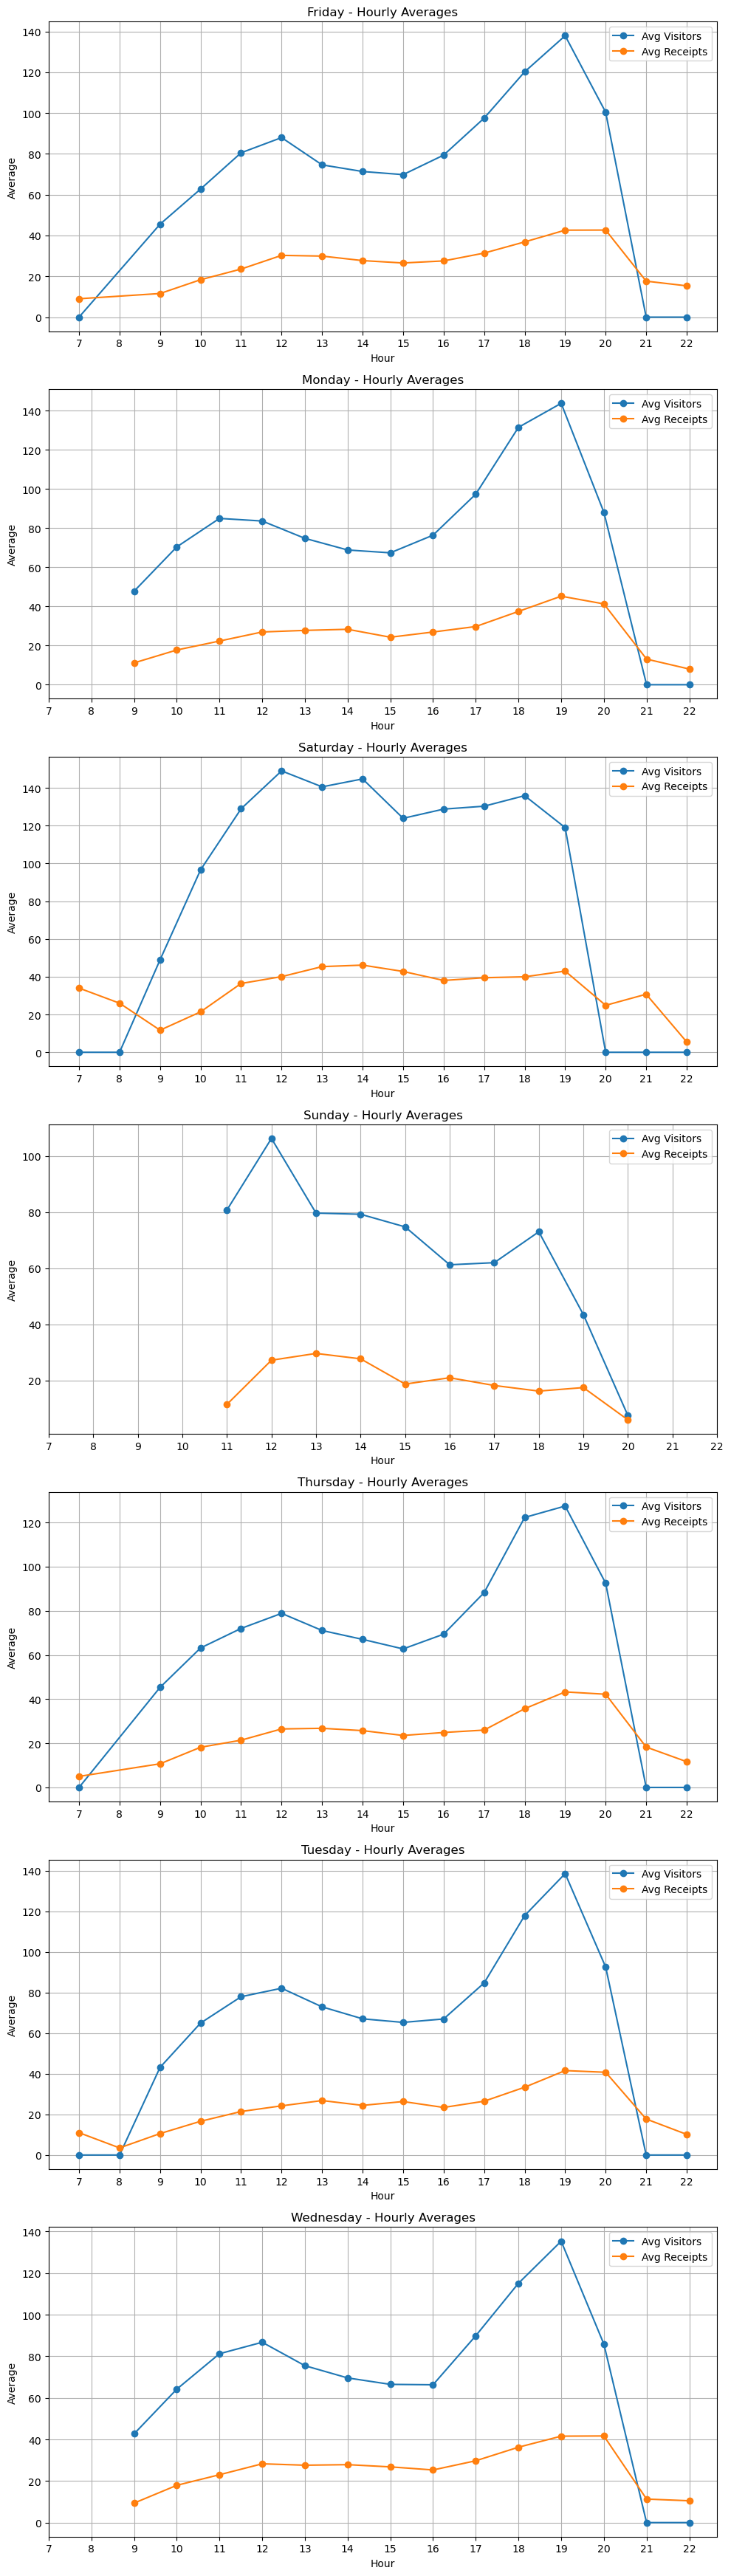

In [18]:
days = day_hour_averages_s6762['day'].unique()

# Δημιουργία line charts για κάθε ημέρα
fig, axes = plt.subplots(len(days), 1, figsize=(10, 5 * len(days)))
all_hours = sorted(day_hour_averages_s6762['hour'].unique())
for i, day in enumerate(days):
    # Φιλτράρισμα δεδομένων για την τρέχουσα ημέρα
    day_data =day_hour_averages_s6762[day_hour_averages_s6762['day'] == day]
    
    # Δημιουργία γραμμών για visitors και receipts
    axes[i].plot(day_data['hour'], day_data['visitors'], label='Avg Visitors', marker='o')
    axes[i].plot(day_data['hour'], day_data['receipts'], label='Avg Receipts', marker='o')
    
    axes[i].set_xticks(all_hours)
    axes[i].set_xticklabels(all_hours)
    
    # Προσθήκη τίτλου και ετικετών
    axes[i].set_title(f'{day} - Hourly Averages')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Average')
    axes[i].legend()
    axes[i].grid(True)

# Προσαρμογή του layout για καλύτερη εμφάνιση
plt.tight_layout()
plt.show()

In [19]:
store_6762['MonthYear'] = pd.to_datetime(store_6762['MonthYear'])
store_6762['month'] = store_6762['MonthYear'].dt.to_period('M')
store_6762['month'] = store_6762['month'].dt.strftime('%B')

nps_6762_merged= pd.merge(store_6762, monthly_averages_s6762, on=['month'], how='inner')

In [20]:
nps_6762_merged


,MonthYear,Detractors %,Passives %,Promoters %,NPS,NPS Response Count,month,visitors,receipts
0,2024-01-01,0.121951,0.118902,0.759146,63.719512,328,January,79.024735,30.869258
1,2024-02-01,0.070513,0.153846,0.775641,70.512821,312,February,70.083067,28.137380
2,2024-03-01,0.093750,0.102679,0.803571,70.982143,224,March,64.800000,26.696552
3,2024-04-01,0.080508,0.110169,0.809322,72.881356,236,April,75.053521,22.357746
4,2024-05-01,0.046025,0.096234,0.857741,81.171548,239,May,81.903846,26.361538
5,2024-06-01,0.119403,0.084577,0.796020,67.661692,201,June,86.940063,26.208202
6,2024-07-01,0.140271,0.131222,0.728507,58.823529,221,July,87.612069,25.732759
7,2024-08-01,0.168367,0.122449,0.709184,54.081633,196,August,87.322917,24.857639
8,2024-09-01,0.109804,0.129412,0.760784,65.098039,255,September,88.871324,33.191176
9,2024-10-01,0.114983,0.090592,0.794425,67.944251,287,October,60.862928,28.928349


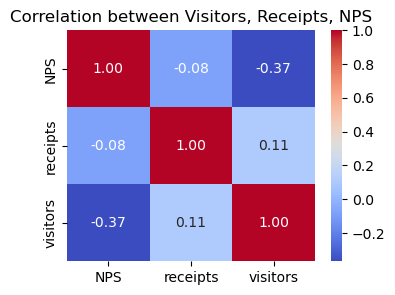

In [21]:
import seaborn as sns
correlation_matrix = nps_6762_merged[['NPS', 'receipts','visitors']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Correlation between Visitors, Receipts, NPS')
plt.show()

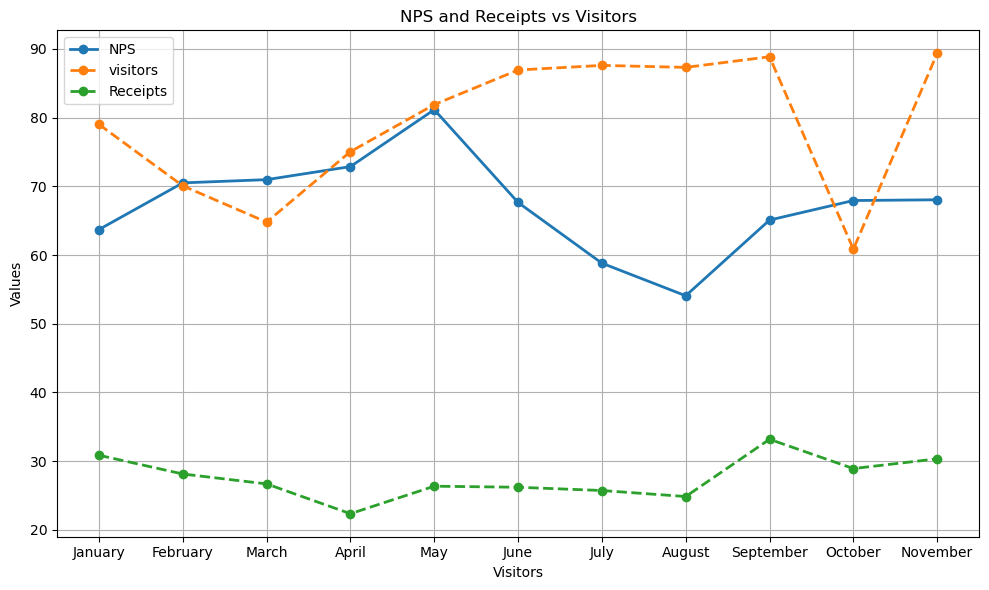

In [22]:
plt.figure(figsize=(10, 6))


plt.plot(nps_6762_merged['month'], nps_6762_merged['NPS'], label='NPS', marker='o', linestyle='-', linewidth=2)
plt.plot(nps_6762_merged['month'], nps_6762_merged['visitors'], label='visitors', marker='o', linestyle='--', linewidth=2)

plt.plot(nps_6762_merged['month'], nps_6762_merged['receipts'], label='Receipts', marker='o', linestyle='--', linewidth=2)


plt.title('NPS and Receipts vs Visitors')
plt.xlabel('Visitors')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [23]:
NPS_means=[['6762',store_6762['NPS'].mean()],['8741',store_8741['NPS'].mean()],[ '7498',store_7498['NPS'].mean()],['7331',store_7331['NPS'].mean()]]

In [24]:
NPS_means =pd.DataFrame(NPS_means, columns=['store', 'NPS'])

In [25]:
NPS_means

,store,NPS
0,6762,67.199044
1,8741,85.984093
2,7498,73.008748
3,7331,72.304515


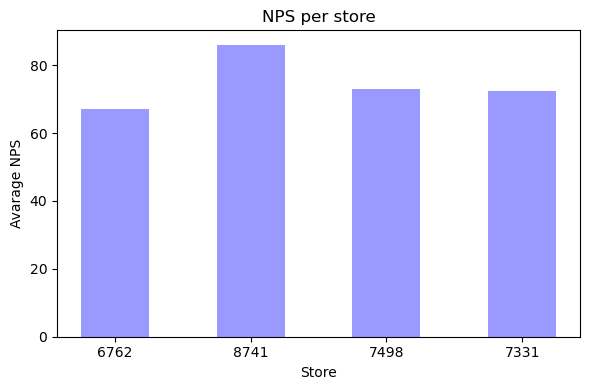

In [26]:
plt.figure(figsize=(6, 4))
plt.bar(NPS_means['store'], NPS_means['NPS'], color='blue', alpha=0.4,width=0.5)


plt.xlabel('Store')
plt.ylabel('Avarage NPS')
plt.title('NPS per store')

plt.tight_layout()
plt.show()

# Store 7498 - PB MALL

In [27]:
s7498['month'] =  s7498['date'].dt.to_period('M')

monthly_averages_s7498 = s7498.groupby('month')[['visitors', 'receipts']].mean()
monthly_averages_s7498.reset_index(inplace=True)
monthly_averages_s7498['month'] = monthly_averages_s7498['month'].dt.strftime('%B')
monthly_averages_s7498

,month,visitors,receipts
0,January,232.360714,59.189286
1,February,192.104575,50.715686
2,March,183.343860,50.035088
3,April,213.564179,50.737313
4,May,210.607261,57.462046
5,June,213.475410,58.763934
6,July,258.362069,66.247126
7,August,332.065068,77.414384
8,September,247.526316,66.703947
9,October,193.902027,51.908784


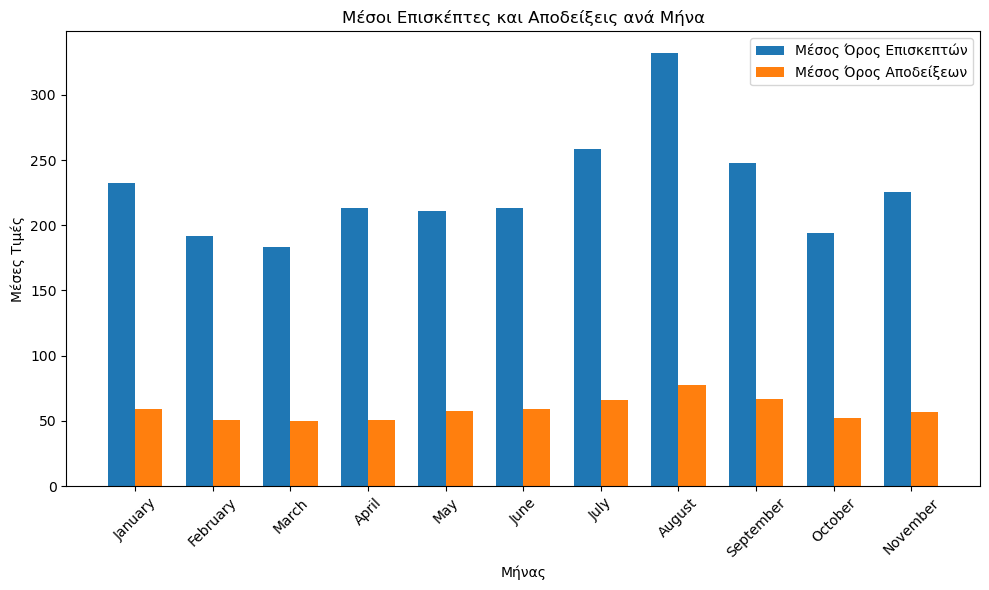

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(monthly_averages_s7498['month']))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Στήλες για avg_visitors
ax.bar(x - width / 2, monthly_averages_s7498['visitors'], width, label='Μέσος Όρος Επισκεπτών')

# Στήλες για avg_receipts
ax.bar(x + width / 2, monthly_averages_s7498['receipts'], width, label='Μέσος Όρος Αποδείξεων')

# Ρυθμίσεις άξονα και τίτλων
ax.set_xlabel('Μήνας')
ax.set_ylabel('Μέσες Τιμές')
ax.set_title('Μέσοι Επισκέπτες και Αποδείξεις ανά Μήνα')
ax.legend()

# Εμφάνιση γραφήματος
ax.set_xticks(x)
ax.set_xticklabels(monthly_averages_s7498['month'])
plt.xticks(rotation=45)  # Περιστροφή των ετικετών του άξονα x
plt.tight_layout()
plt.show()

In [29]:
s7498['day'] = s7498['date'].dt.day_name()
s7498['month_name'] = s7498['month'].dt.strftime('%B')
month_day_averages_s7498 = s7498.groupby(['month_name','day'])[['visitors', 'receipts']].mean()
month_day_averages_s7498.reset_index(inplace=True)
month_day_averages_s7498

,month_name,day,visitors,receipts
0,April,Friday,212.854545,51.363636
1,April,Monday,181.227273,44.409091
2,April,Saturday,377.694444,88.777778
3,April,Sunday,452.444444,93.222222
4,April,Thursday,178.333333,43.176471
...,...,...,...,...
64,September,Monday,240.784615,66.230769
65,September,Saturday,392.161290,81.193548
66,September,Thursday,199.886792,60.547170
67,September,Tuesday,235.096154,65.076923


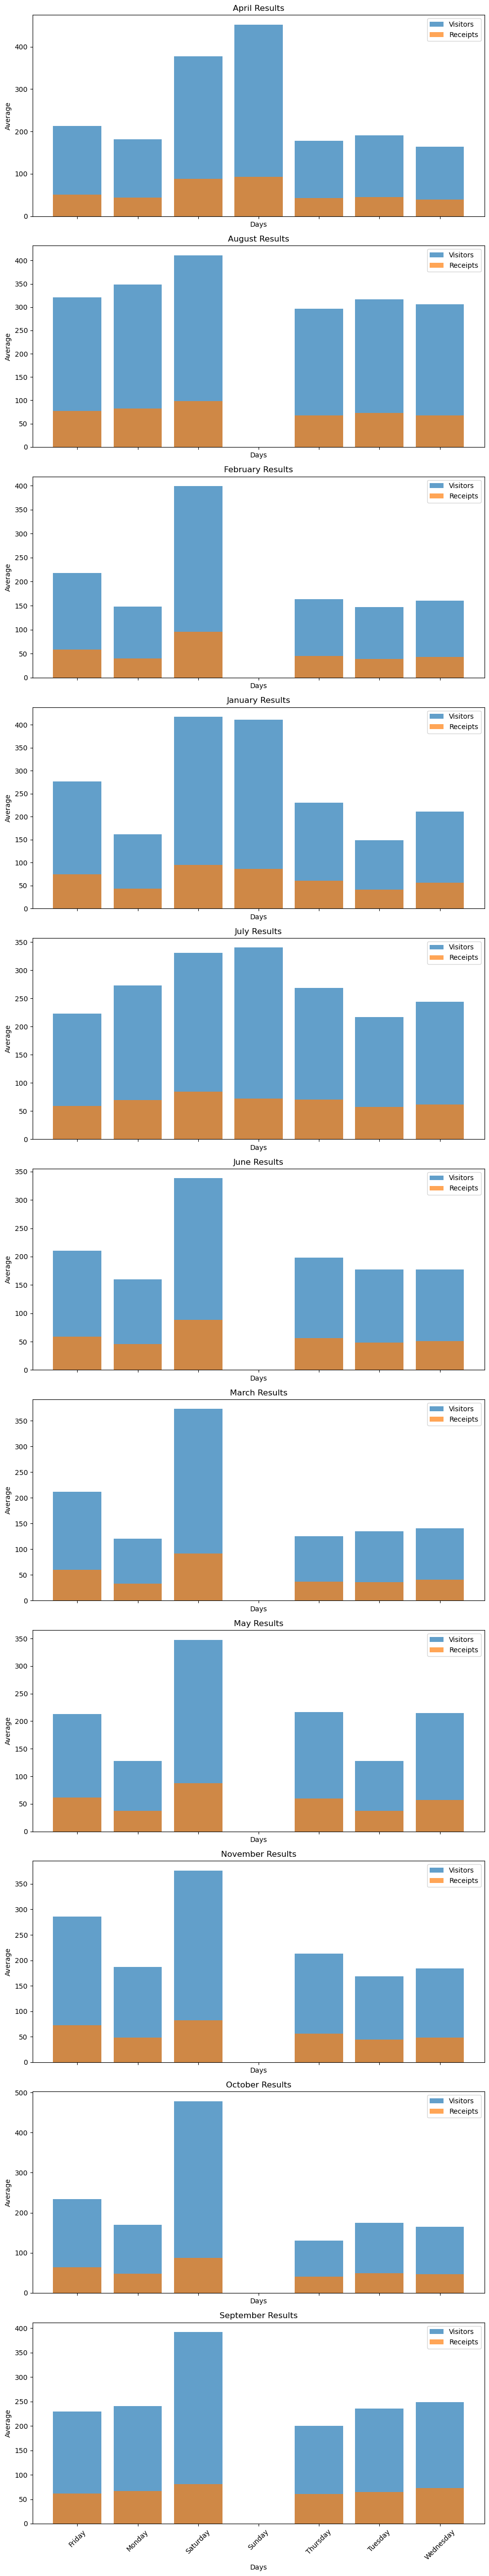

In [30]:
months = month_day_averages_s7498['month_name'].unique()

# Δημιουργία πολλαπλών plots
fig, axes = plt.subplots(len(months), 1, figsize=(10, 5 * len(months)), sharex=True)

for i, month in enumerate(months):
    # Φιλτράρισμα δεδομένων για κάθε μήνα
    month_data =  month_day_averages_s7498[ month_day_averages_s7498['month_name'] == month]
    
    # Δημιουργία plot για κάθε μήνα
    axes[i].bar(month_data['day'], month_data['visitors'], label='Visitors', alpha=0.7)
    axes[i].bar(month_data['day'], month_data['receipts'], label='Receipts', alpha=0.7)
    
    axes[i].set_xticks(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])
    axes[i].set_xticklabels(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], rotation=45) 

    # Προσθήκη τίτλου και ρυθμίσεις
    axes[i].set_title(f'{month} Results')
    axes[i].set_ylabel('Average')
    axes[i].set_xlabel('Days')
    axes[i].legend()
   




# Ρύθμιση layout
  # Ρυθμίσεις για να μην επικαλύπτονται οι ετικέτες
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [31]:
day_hour_averages_s7498 = s7498.groupby(['day','hour'])[['visitors', 'receipts']].mean()
day_hour_averages_s7498.reset_index(inplace=True)
day_hour_averages_s7498

,day,hour,visitors,receipts
0,Friday,7,0.000000,20.500000
1,Friday,8,0.000000,3.391304
2,Friday,9,1.250000,4.833333
3,Friday,10,119.130435,19.804348
4,Friday,11,199.913043,46.130435
...,...,...,...,...
101,Wednesday,18,299.782609,67.586957
102,Wednesday,19,358.866667,86.644444
103,Wednesday,20,291.934783,86.152174
104,Wednesday,21,0.000000,23.586957


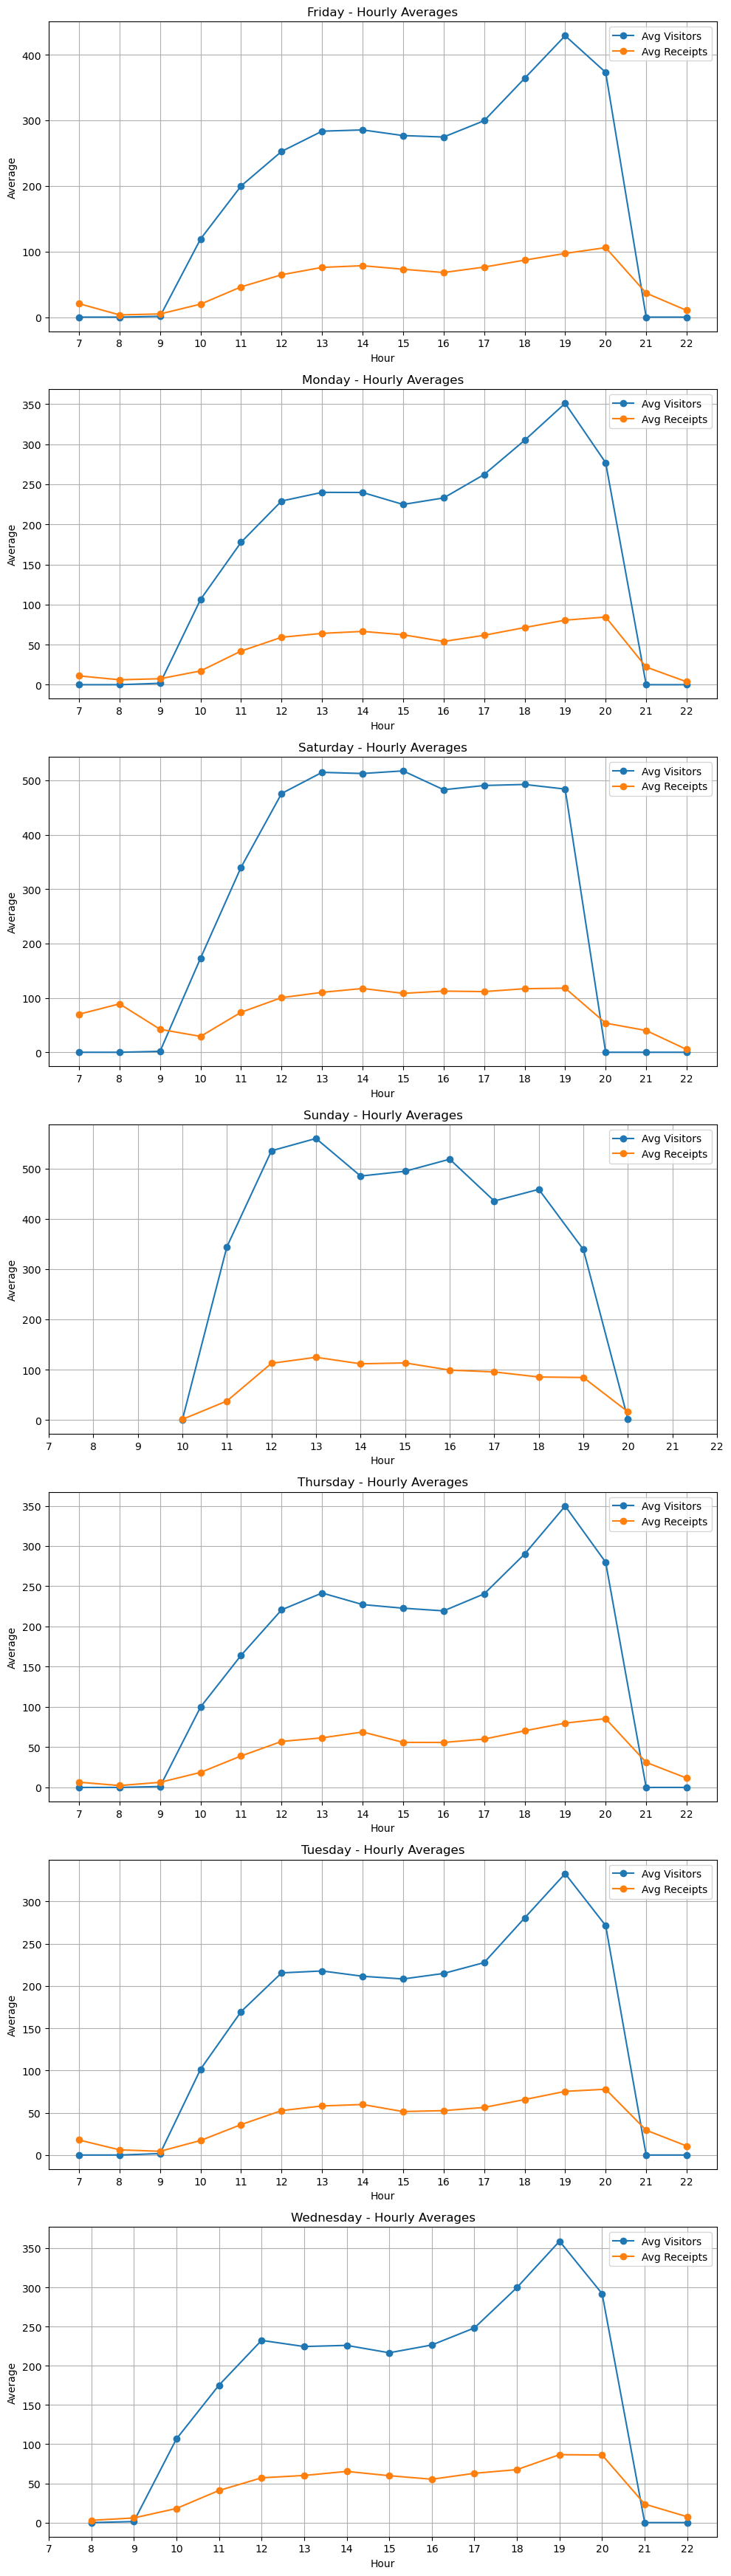

In [32]:
days = day_hour_averages_s7498['day'].unique()

# Δημιουργία line charts για κάθε ημέρα
fig, axes = plt.subplots(len(days), 1, figsize=(10, 5 * len(days)))
all_hours = sorted(day_hour_averages_s7498['hour'].unique())
for i, day in enumerate(days):
    # Φιλτράρισμα δεδομένων για την τρέχουσα ημέρα
    day_data =day_hour_averages_s7498[day_hour_averages_s7498['day'] == day]
    
    # Δημιουργία γραμμών για visitors και receipts
    axes[i].plot(day_data['hour'], day_data['visitors'], label='Avg Visitors', marker='o')
    axes[i].plot(day_data['hour'], day_data['receipts'], label='Avg Receipts', marker='o')
    
    axes[i].set_xticks(all_hours)
    axes[i].set_xticklabels(all_hours)
    
    # Προσθήκη τίτλου και ετικετών
    axes[i].set_title(f'{day} - Hourly Averages')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Average')
    axes[i].legend()
    axes[i].grid(True)

# Προσαρμογή του layout για καλύτερη εμφάνιση
plt.tight_layout()
plt.show()

In [33]:
store_7498['MonthYear'] = pd.to_datetime(store_7498['MonthYear'])
store_7498['month'] = store_7498['MonthYear'].dt.to_period('M')
store_7498['month'] = store_7498['month'].dt.strftime('%B')

nps_7498_merged= pd.merge(store_7498, monthly_averages_s7498, on=['month'], how='inner')
nps_7498_merged

,MonthYear,Detractors %,Passives %,Promoters %,NPS,month,visitors,receipts
0,2024-01-01,0.142202,0.110092,0.747706,60.550459,January,232.360714,59.189286
1,2024-02-01,0.114130,0.103261,0.782609,66.847826,February,192.104575,50.715686
2,2024-03-01,0.056604,0.113208,0.830189,77.358491,March,183.343860,50.035088
3,2024-04-01,0.035354,0.085859,0.878788,84.343434,April,213.564179,50.737313
4,2024-05-01,0.074074,0.095238,0.830688,75.661376,May,210.607261,57.462046
5,2024-06-01,0.089005,0.104712,0.806283,71.727749,June,213.475410,58.763934
6,2024-07-01,0.050000,0.072727,0.877273,82.727273,July,258.362069,66.247126
7,2024-08-01,0.074074,0.107407,0.818519,74.444444,August,332.065068,77.414384
8,2024-09-01,0.089552,0.095522,0.814925,72.537313,September,247.526316,66.703947
9,2024-10-01,0.080292,0.087591,0.832117,75.182482,October,193.902027,51.908784


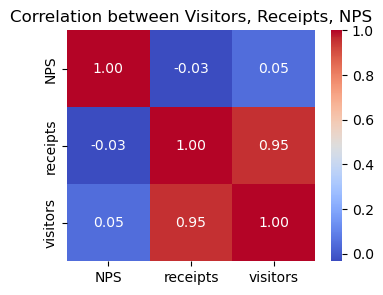

In [34]:
import seaborn as sns
correlation_matrix = nps_7498_merged[['NPS', 'receipts','visitors']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Correlation between Visitors, Receipts, NPS')
plt.show()

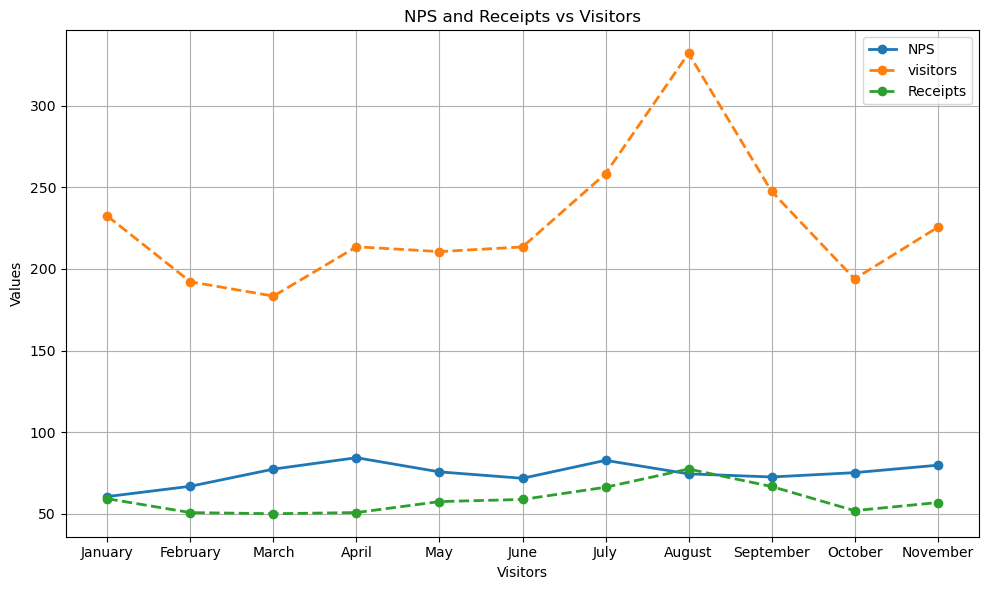

In [35]:
plt.figure(figsize=(10, 6))


plt.plot(nps_7498_merged['month'], nps_7498_merged['NPS'], label='NPS', marker='o', linestyle='-', linewidth=2)
plt.plot(nps_7498_merged['month'], nps_7498_merged['visitors'], label='visitors', marker='o', linestyle='--', linewidth=2)

plt.plot(nps_7498_merged['month'], nps_7498_merged['receipts'], label='Receipts', marker='o', linestyle='--', linewidth=2)


plt.title('NPS and Receipts vs Visitors')
plt.xlabel('Visitors')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

# Store 7331 Small Store Athens

In [36]:
s7331['month'] =  s7331['date'].dt.to_period('M')

monthly_averages_s7331 = s7331.groupby('month')[['visitors', 'receipts']].mean()
monthly_averages_s7331.reset_index(inplace=True)
monthly_averages_s7331['month'] = monthly_averages_s7331['month'].dt.strftime('%B')
monthly_averages_s7331

,month,visitors,receipts
0,January,89.453901,32.269504
1,February,83.971154,30.532051
2,March,85.477509,31.453287
3,April,81.758523,27.178977
4,May,81.315951,30.533742
5,June,79.041420,27.707101
6,July,74.287749,27.601140
7,August,77.424437,27.694534
8,September,97.373665,38.021352
9,October,81.805825,33.237864


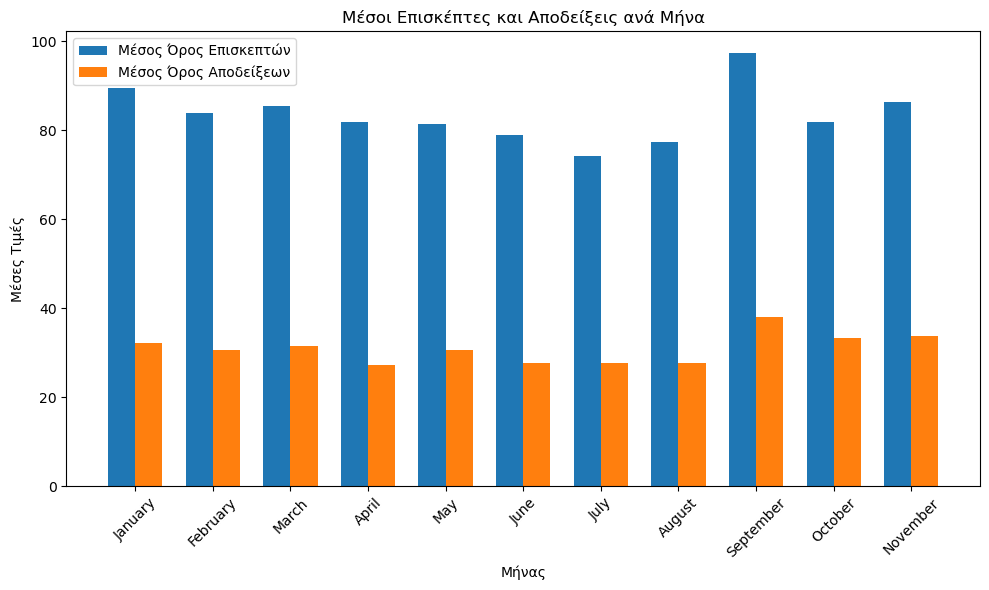

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(monthly_averages_s7331['month']))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Στήλες για avg_visitors
ax.bar(x - width / 2, monthly_averages_s7331['visitors'], width, label='Μέσος Όρος Επισκεπτών')

# Στήλες για avg_receipts
ax.bar(x + width / 2, monthly_averages_s7331['receipts'], width, label='Μέσος Όρος Αποδείξεων')

# Ρυθμίσεις άξονα και τίτλων
ax.set_xlabel('Μήνας')
ax.set_ylabel('Μέσες Τιμές')
ax.set_title('Μέσοι Επισκέπτες και Αποδείξεις ανά Μήνα')
ax.legend()

# Εμφάνιση γραφήματος
ax.set_xticks(x)
ax.set_xticklabels(monthly_averages_s7331['month'])
plt.xticks(rotation=45)  # Περιστροφή των ετικετών του άξονα x
plt.tight_layout()
plt.show()

In [40]:
s7331['day'] = s7331['date'].dt.day_name()
s7331['month_name'] = s7331['month'].dt.strftime('%B')
month_day_averages_s7331 = s7331.groupby(['month_name','day'])[['visitors', 'receipts']].mean()
month_day_averages_s7331.reset_index(inplace=True)
month_day_averages_s7331

,month_name,day,visitors,receipts
0,April,Friday,80.250000,27.553571
1,April,Monday,74.328358,25.477612
2,April,Saturday,118.565217,39.021739
3,April,Sunday,137.428571,34.142857
4,April,Thursday,72.339623,23.584906
...,...,...,...,...
64,September,Monday,95.775862,36.224138
65,September,Saturday,129.939394,48.454545
66,September,Thursday,85.595745,35.531915
67,September,Tuesday,94.326531,35.020408


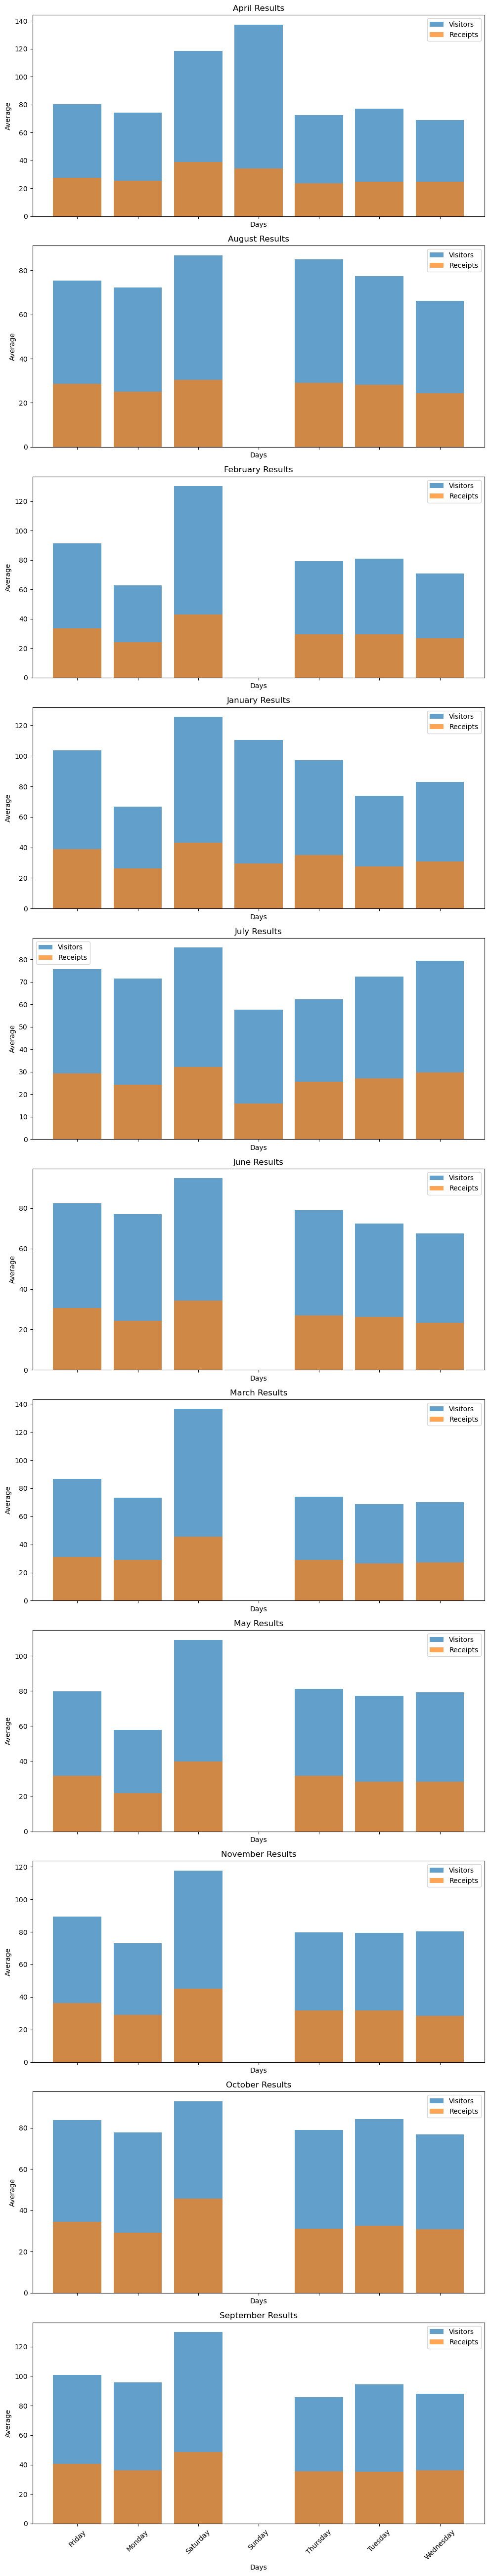

In [41]:
months = month_day_averages_s7331['month_name'].unique()

# Δημιουργία πολλαπλών plots
fig, axes = plt.subplots(len(months), 1, figsize=(10, 5 * len(months)), sharex=True)

for i, month in enumerate(months):
    # Φιλτράρισμα δεδομένων για κάθε μήνα
    month_data =  month_day_averages_s7331[ month_day_averages_s7331['month_name'] == month]
    
    # Δημιουργία plot για κάθε μήνα
    axes[i].bar(month_data['day'], month_data['visitors'], label='Visitors', alpha=0.7)
    axes[i].bar(month_data['day'], month_data['receipts'], label='Receipts', alpha=0.7)
    
    axes[i].set_xticks(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])
    axes[i].set_xticklabels(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], rotation=45) 

    # Προσθήκη τίτλου και ρυθμίσεις
    axes[i].set_title(f'{month} Results')
    axes[i].set_ylabel('Average')
    axes[i].set_xlabel('Days')
    axes[i].legend()
   




# Ρύθμιση layout
  # Ρυθμίσεις για να μην επικαλύπτονται οι ετικέτες
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [42]:
day_hour_averages_s7331 = s7331.groupby(['day','hour'])[['visitors', 'receipts']].mean()
day_hour_averages_s7331.reset_index(inplace=True)
day_hour_averages_s7331

,day,hour,visitors,receipts
0,Friday,7,0.000000,13.000000
1,Friday,8,0.000000,1.000000
2,Friday,9,39.380952,8.666667
3,Friday,10,60.909091,22.090909
4,Friday,11,82.214286,29.809524
...,...,...,...,...
97,Wednesday,18,122.571429,41.285714
98,Wednesday,19,144.675000,50.250000
99,Wednesday,20,104.119048,45.500000
100,Wednesday,21,0.000000,9.309524


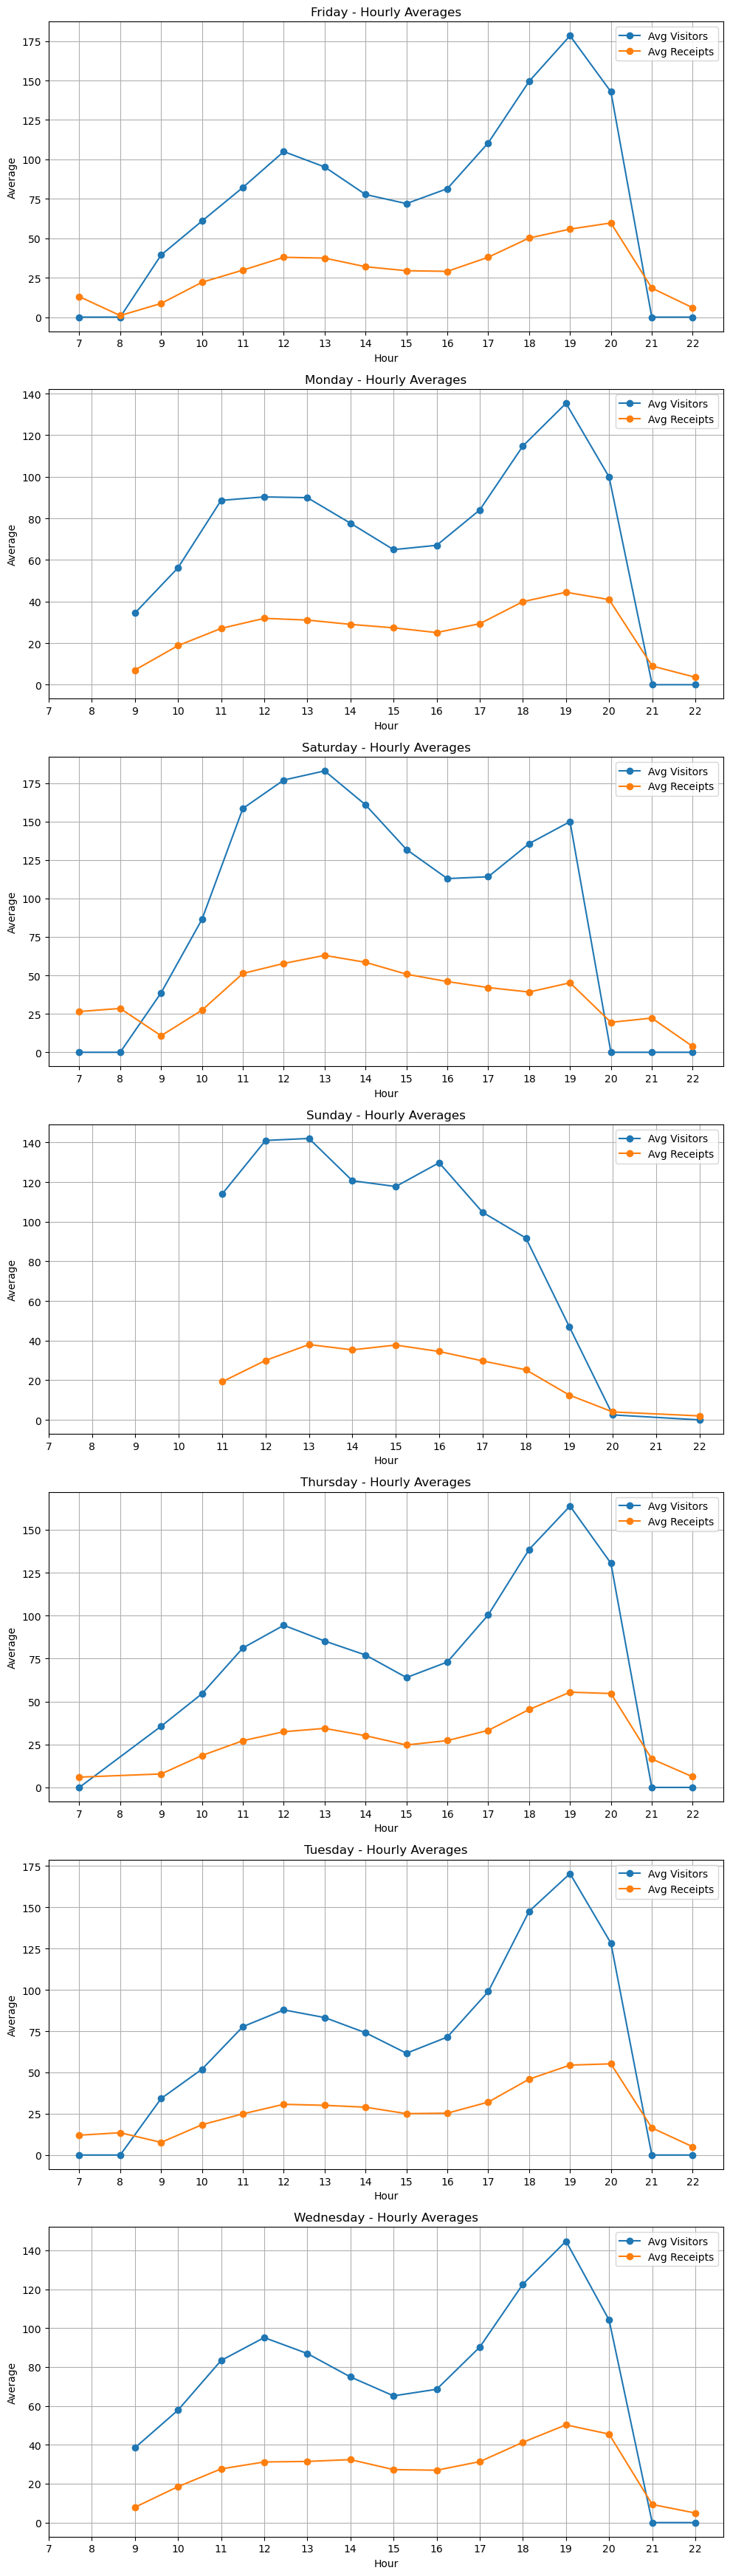

In [43]:
days = day_hour_averages_s7331['day'].unique()

# Δημιουργία line charts για κάθε ημέρα
fig, axes = plt.subplots(len(days), 1, figsize=(10, 5 * len(days)))
all_hours = sorted(day_hour_averages_s7331['hour'].unique())
for i, day in enumerate(days):
    # Φιλτράρισμα δεδομένων για την τρέχουσα ημέρα
    day_data =day_hour_averages_s7331[day_hour_averages_s7331['day'] == day]
    
    # Δημιουργία γραμμών για visitors και receipts
    axes[i].plot(day_data['hour'], day_data['visitors'], label='Avg Visitors', marker='o')
    axes[i].plot(day_data['hour'], day_data['receipts'], label='Avg Receipts', marker='o')
    
    axes[i].set_xticks(all_hours)
    axes[i].set_xticklabels(all_hours)
    
    # Προσθήκη τίτλου και ετικετών
    axes[i].set_title(f'{day} - Hourly Averages')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Average')
    axes[i].legend()
    axes[i].grid(True)

# Προσαρμογή του layout για καλύτερη εμφάνιση
plt.tight_layout()
plt.show()

In [45]:
store_7331['MonthYear'] = pd.to_datetime(store_7331['MonthYear'])
store_7331['month'] = store_7331['MonthYear'].dt.to_period('M')
store_7331['month'] = store_7331['month'].dt.strftime('%B')
nps_7331_merged= pd.merge(store_7331, monthly_averages_s7331, on=['month'], how='inner')
nps_7331_merged

,MonthYear,Detractors %,Passives %,Promoters %,NPS,NPS Response Count,month,visitors,receipts
0,2024-01-01,0.123457,0.102881,0.773663,65.020576,243,January,89.453901,32.269504
1,2024-02-01,0.070652,0.092391,0.836957,76.630435,184,February,83.971154,30.532051
2,2024-03-01,0.064935,0.090909,0.844156,77.922078,154,March,85.477509,31.453287
3,2024-04-01,0.080460,0.143678,0.775862,69.540230,174,April,81.758523,27.178977
4,2024-05-01,0.095745,0.063830,0.840426,74.468085,188,May,81.315951,30.533742
5,2024-06-01,0.038961,0.097403,0.863636,82.467532,154,June,79.041420,27.707101
6,2024-07-01,0.070652,0.135870,0.793478,72.282609,184,July,74.287749,27.601140
7,2024-08-01,0.056122,0.091837,0.852041,79.591837,196,August,77.424437,27.694534
8,2024-09-01,0.096234,0.079498,0.824268,72.803347,239,September,97.373665,38.021352
9,2024-10-01,0.088235,0.068627,0.843137,75.490196,204,October,81.805825,33.237864


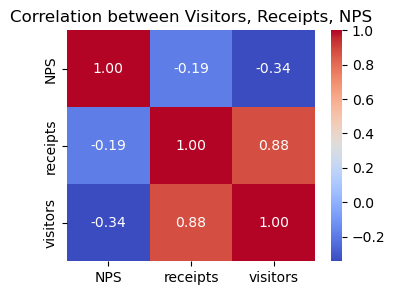

In [46]:
import seaborn as sns
correlation_matrix = nps_7331_merged[['NPS', 'receipts','visitors']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Correlation between Visitors, Receipts, NPS')
plt.show()

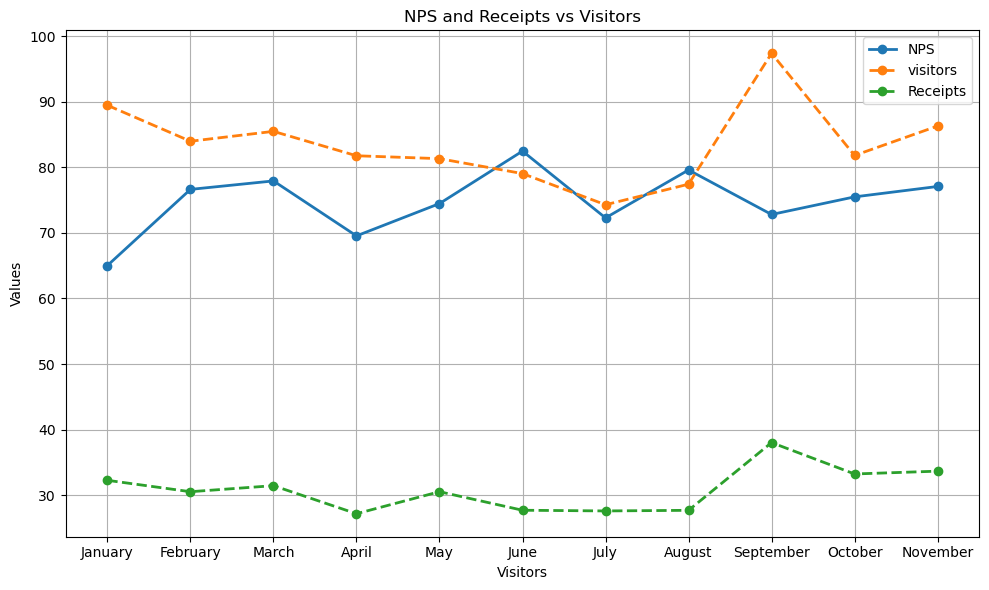

In [47]:
plt.figure(figsize=(10, 6))


plt.plot(nps_7331_merged['month'], nps_7331_merged['NPS'], label='NPS', marker='o', linestyle='-', linewidth=2)
plt.plot(nps_7331_merged['month'], nps_7331_merged['visitors'], label='visitors', marker='o', linestyle='--', linewidth=2)

plt.plot(nps_7331_merged['month'], nps_7331_merged['receipts'], label='Receipts', marker='o', linestyle='--', linewidth=2)


plt.title('NPS and Receipts vs Visitors')
plt.xlabel('Visitors')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

# Store 8741- Small Store Επαρχεια

In [48]:
s8741['month'] =  s8741['date'].dt.to_period('M')

monthly_averages_s8741 = s8741.groupby('month')[['visitors', 'receipts']].mean()
monthly_averages_s8741.reset_index(inplace=True)
monthly_averages_s8741['month'] = monthly_averages_s8741['month'].dt.strftime('%B')
monthly_averages_s8741

,month,visitors,receipts
0,January,97.305455,33.680000
1,February,96.937500,34.353125
2,March,89.983165,32.367003
3,April,90.433333,28.166667
4,May,90.945122,32.753049
5,June,90.590643,30.935673
6,July,108.972527,35.241758
7,August,126.549342,41.269737
8,September,125.028674,43.494624
9,October,100.478006,36.299120


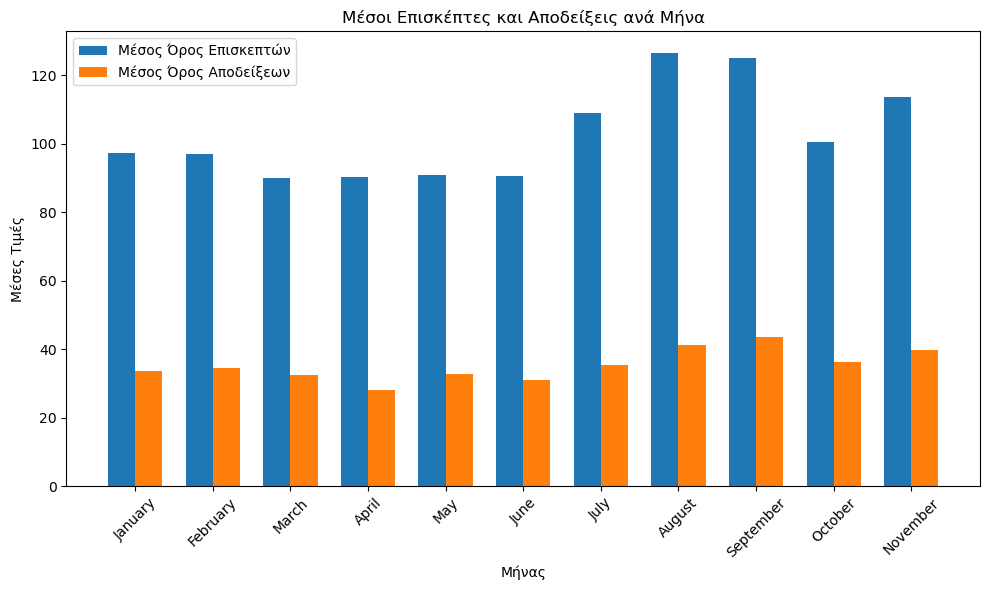

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(monthly_averages_s8741['month']))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

# Στήλες για avg_visitors
ax.bar(x - width / 2, monthly_averages_s8741['visitors'], width, label='Μέσος Όρος Επισκεπτών')

# Στήλες για avg_receipts
ax.bar(x + width / 2, monthly_averages_s8741['receipts'], width, label='Μέσος Όρος Αποδείξεων')

# Ρυθμίσεις άξονα και τίτλων
ax.set_xlabel('Μήνας')
ax.set_ylabel('Μέσες Τιμές')
ax.set_title('Μέσοι Επισκέπτες και Αποδείξεις ανά Μήνα')
ax.legend()

# Εμφάνιση γραφήματος
ax.set_xticks(x)
ax.set_xticklabels(monthly_averages_s8741['month'])
plt.xticks(rotation=45)  # Περιστροφή των ετικετών του άξονα x
plt.tight_layout()
plt.show()

In [50]:
s8741['day'] = s8741['date'].dt.day_name()
s8741['month_name'] = s8741['month'].dt.strftime('%B')
month_day_averages_s8741 = s8741.groupby(['month_name','day'])[['visitors', 'receipts']].mean()
month_day_averages_s8741.reset_index(inplace=True)
month_day_averages_s8741

,month_name,day,visitors,receipts
0,April,Friday,91.436364,29.509091
1,April,Monday,81.402985,26.462687
2,April,Saturday,132.115385,39.442308
3,April,Sunday,156.444444,41.777778
4,April,Thursday,81.092593,27.092593
...,...,...,...,...
64,September,Monday,130.269841,45.365079
65,September,Saturday,147.793103,45.586207
66,September,Thursday,115.729167,41.708333
67,September,Tuesday,120.549020,44.921569


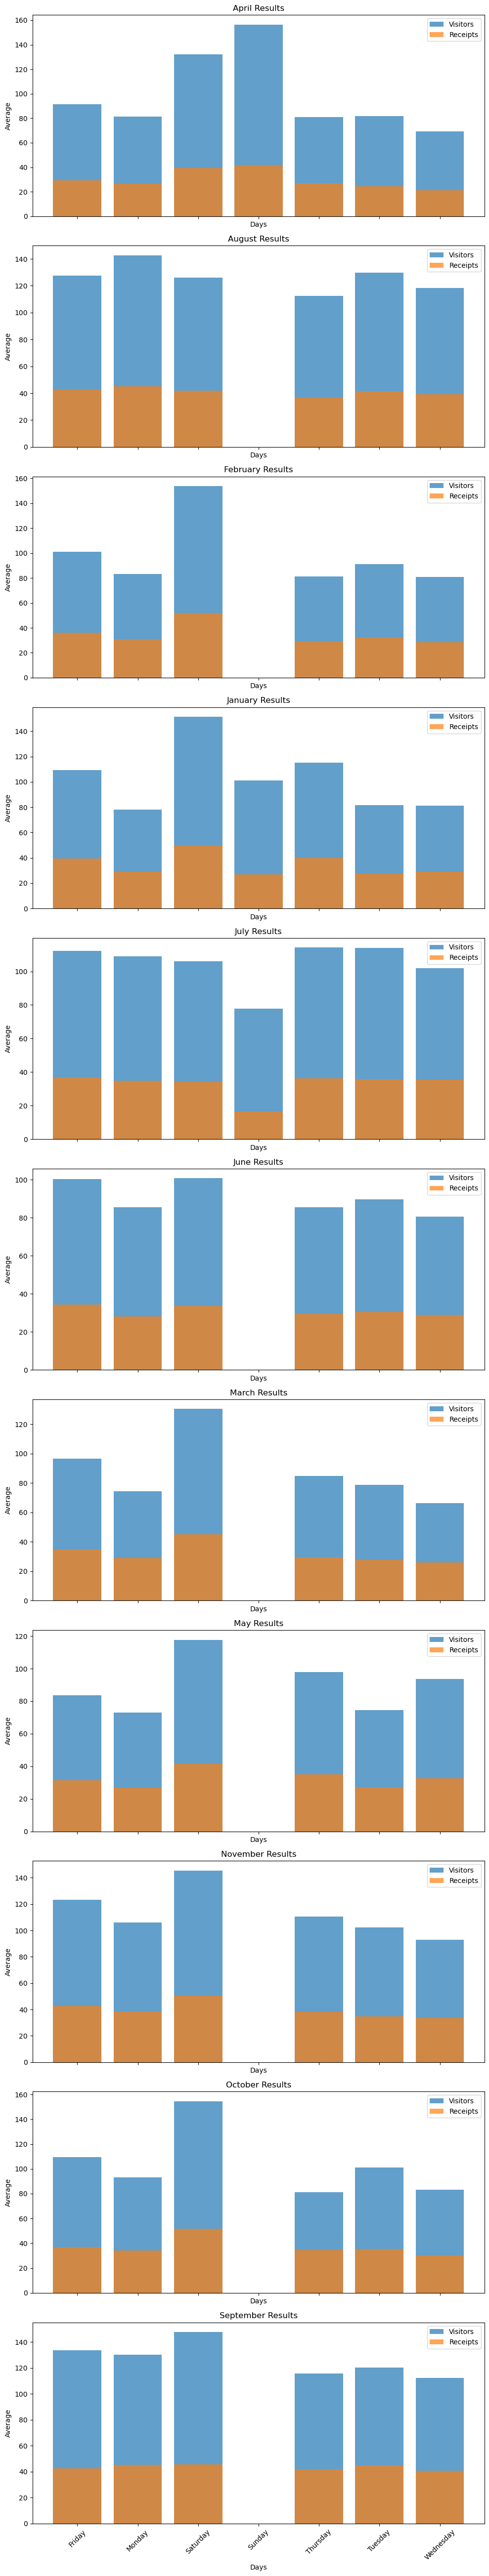

In [51]:
months = month_day_averages_s8741['month_name'].unique()

# Δημιουργία πολλαπλών plots
fig, axes = plt.subplots(len(months), 1, figsize=(10, 5 * len(months)), sharex=True)

for i, month in enumerate(months):
    # Φιλτράρισμα δεδομένων για κάθε μήνα
    month_data =  month_day_averages_s8741[ month_day_averages_s8741['month_name'] == month]
    
    # Δημιουργία plot για κάθε μήνα
    axes[i].bar(month_data['day'], month_data['visitors'], label='Visitors', alpha=0.7)
    axes[i].bar(month_data['day'], month_data['receipts'], label='Receipts', alpha=0.7)
    
    axes[i].set_xticks(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])
    axes[i].set_xticklabels(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], rotation=45) 

    # Προσθήκη τίτλου και ρυθμίσεις
    axes[i].set_title(f'{month} Results')
    axes[i].set_ylabel('Average')
    axes[i].set_xlabel('Days')
    axes[i].legend()
   




# Ρύθμιση layout
  # Ρυθμίσεις για να μην επικαλύπτονται οι ετικέτες
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [52]:
day_hour_averages_s8741 = s8741.groupby(['day','hour'])[['visitors', 'receipts']].mean()
day_hour_averages_s8741.reset_index(inplace=True)
day_hour_averages_s8741

,day,hour,visitors,receipts
0,Friday,7,0.000000,10.500000
1,Friday,9,48.627907,11.418605
2,Friday,10,82.244444,25.288889
3,Friday,11,123.733333,39.844444
4,Friday,12,142.714286,44.071429
...,...,...,...,...
96,Wednesday,18,125.565217,41.130435
97,Wednesday,19,139.866667,48.155556
98,Wednesday,20,98.266667,44.688889
99,Wednesday,21,0.000000,11.446809


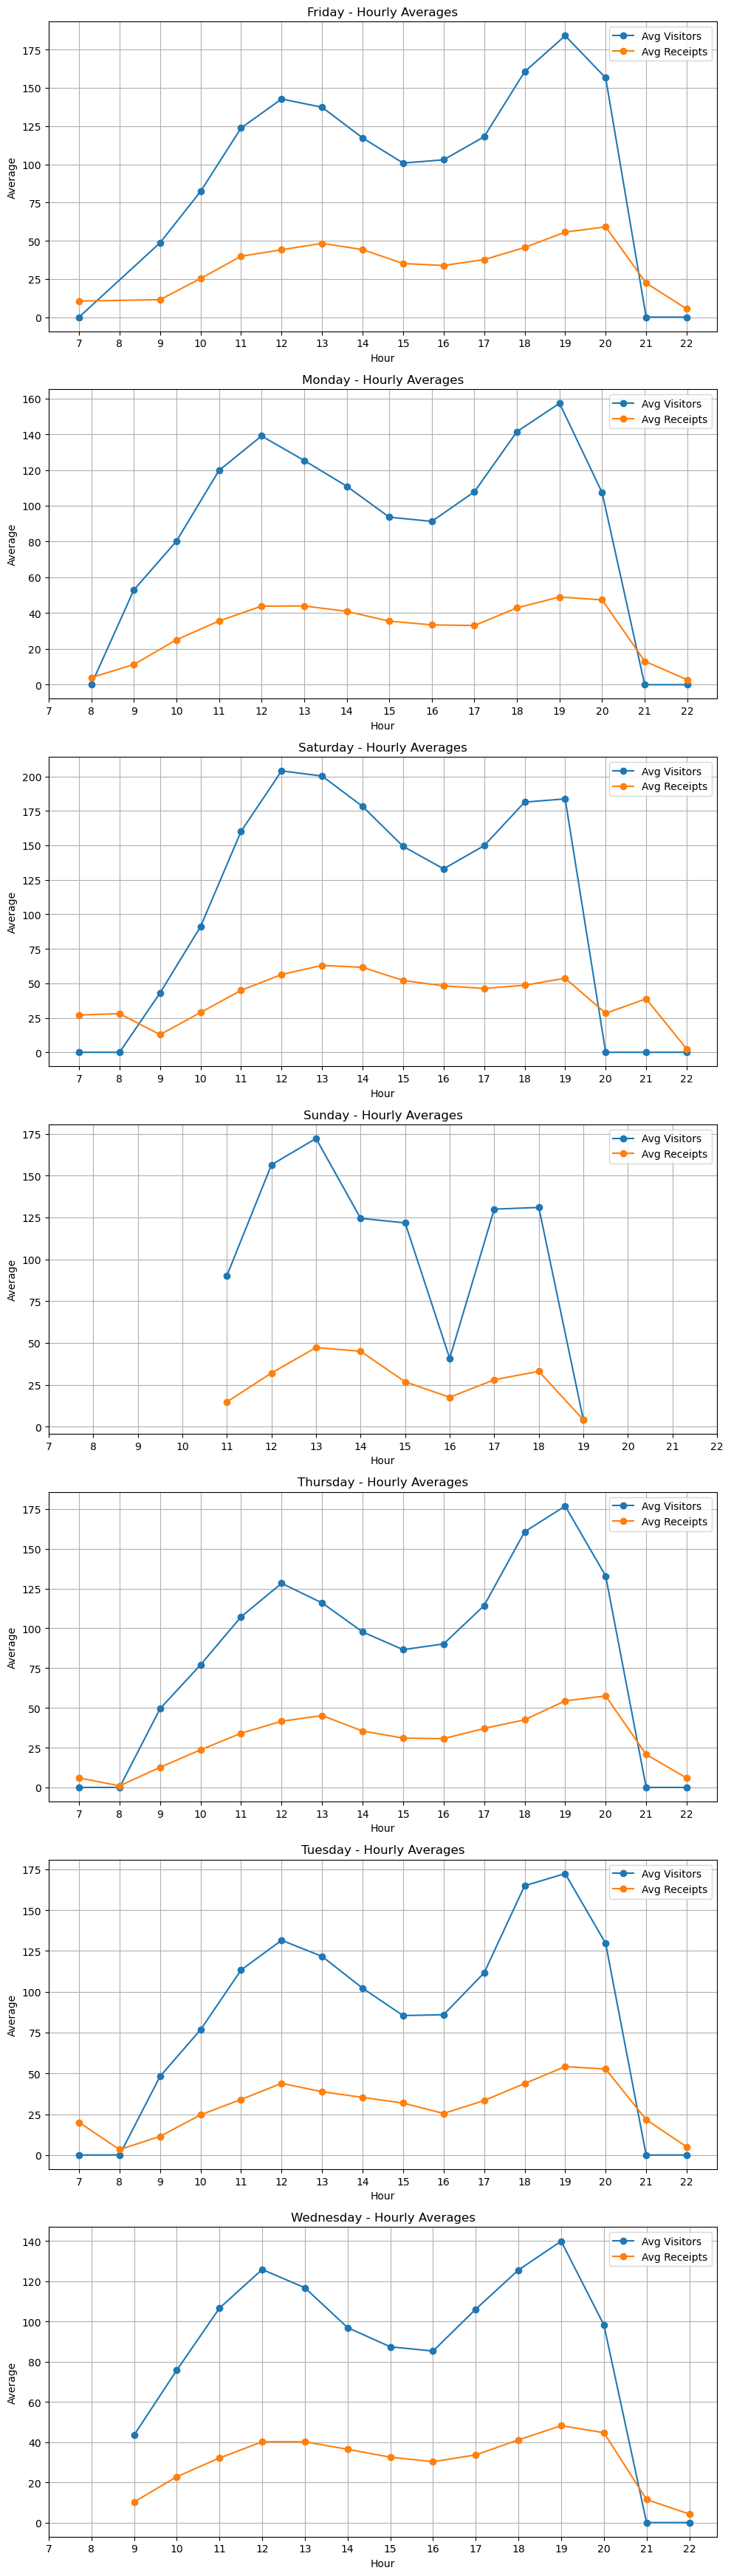

In [53]:
days = day_hour_averages_s8741['day'].unique()

# Δημιουργία line charts για κάθε ημέρα
fig, axes = plt.subplots(len(days), 1, figsize=(10, 5 * len(days)))
all_hours = sorted(day_hour_averages_s8741['hour'].unique())
for i, day in enumerate(days):
    # Φιλτράρισμα δεδομένων για την τρέχουσα ημέρα
    day_data =day_hour_averages_s8741[day_hour_averages_s8741['day'] == day]
    
    # Δημιουργία γραμμών για visitors και receipts
    axes[i].plot(day_data['hour'], day_data['visitors'], label='Avg Visitors', marker='o')
    axes[i].plot(day_data['hour'], day_data['receipts'], label='Avg Receipts', marker='o')
    
    axes[i].set_xticks(all_hours)
    axes[i].set_xticklabels(all_hours)
    
    # Προσθήκη τίτλου και ετικετών
    axes[i].set_title(f'{day} - Hourly Averages')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Average')
    axes[i].legend()
    axes[i].grid(True)

# Προσαρμογή του layout για καλύτερη εμφάνιση
plt.tight_layout()
plt.show()

In [54]:
store_8741['MonthYear'] = pd.to_datetime(store_8741['MonthYear'])
store_8741['month'] = store_8741['MonthYear'].dt.to_period('M')
store_8741['month'] = store_8741['month'].dt.strftime('%B')

nps_8741_merged= pd.merge(store_8741, monthly_averages_s8741, on=['month'], how='inner')
nps_8741_merged

,MonthYear,Detractors %,Passives %,Promoters %,NPS,NPS Response Count,month,visitors,receipts
0,2024-01-01,0.048913,0.054348,0.896739,84.782609,368,January,97.305455,33.680000
1,2024-02-01,0.034591,0.044025,0.921384,88.679245,318,February,96.937500,34.353125
2,2024-03-01,0.018634,0.043478,0.937888,91.925466,322,March,89.983165,32.367003
3,2024-04-01,0.043103,0.056034,0.900862,85.775862,232,April,90.433333,28.166667
4,2024-05-01,0.037671,0.034247,0.928082,89.041096,292,May,90.945122,32.753049
5,2024-06-01,0.015748,0.051181,0.933071,91.732283,254,June,90.590643,30.935673
6,2024-07-01,0.021944,0.043887,0.934169,91.222571,319,July,108.972527,35.241758
7,2024-08-01,0.047761,0.041791,0.910448,86.268657,335,August,126.549342,41.269737
8,2024-09-01,0.040541,0.040541,0.918919,87.837838,370,September,125.028674,43.494624
9,2024-10-01,0.033639,0.058104,0.908257,87.461774,327,October,100.478006,36.299120


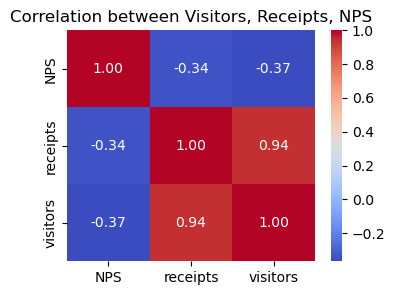

In [55]:
import seaborn as sns
correlation_matrix = nps_8741_merged[['NPS', 'receipts','visitors']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Correlation between Visitors, Receipts, NPS')
plt.show()

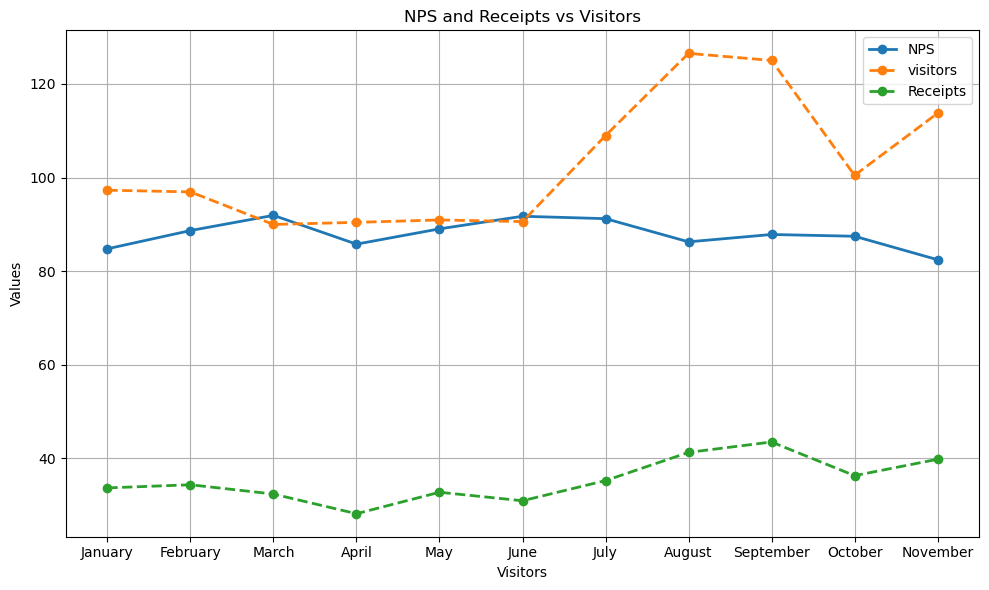

In [56]:
plt.figure(figsize=(10, 6))


plt.plot(nps_8741_merged['month'], nps_8741_merged['NPS'], label='NPS', marker='o', linestyle='-', linewidth=2)
plt.plot(nps_8741_merged['month'], nps_8741_merged['visitors'], label='visitors', marker='o', linestyle='--', linewidth=2)

plt.plot(nps_8741_merged['month'], nps_8741_merged['receipts'], label='Receipts', marker='o', linestyle='--', linewidth=2)


plt.title('NPS and Receipts vs Visitors')
plt.xlabel('Visitors')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()